In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import ast

In [10]:
df = pd.read_csv("cleaned_data.csv")
df['job_skills'] = df['job_skills'].apply(
    lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list
)

In [11]:
df_US = df[df.job_country == "United States"] 

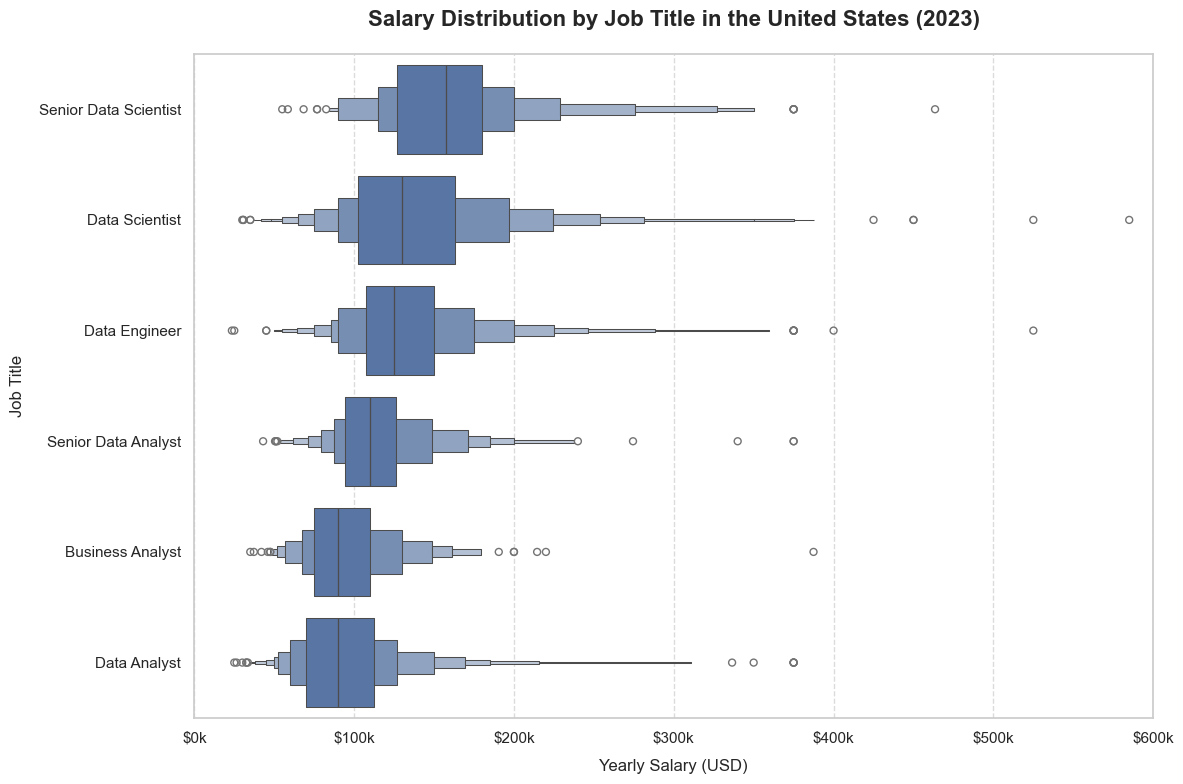

In [12]:
job_titles = df_US.job_title_short.value_counts().head(6).index.to_list()
df_us_top6 = df_US[df_US.job_title_short.isin(job_titles)]
df_us_top6 = df_us_top6.dropna(subset=["salary_year_avg"])
job_order = df_us_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

sns.set_theme(style="whitegrid")

# Create the boxenplot
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_us_top6, 
    x="salary_year_avg", 
    y="job_title_short", 
    order=job_order
)

# Add a descriptive title and axis labels
plt.title("Salary Distribution by Job Title in the United States (2023)", fontsize=16, weight="bold", pad=20)
plt.xlabel("Yearly Salary (USD)", fontsize=12, labelpad=10)
plt.ylabel("Job Title", fontsize=12, labelpad=10)

# Customize the x-axis scale and format
plt.xlim(0, 600000)
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"${int(x / 1000)}k")

# Add grid lines for easier interpretation
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
df_DA_US = df[(df.job_title_short == "Data Analyst") & (df.job_country == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [14]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_top_pay = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count" , "median"]).sort_values(by="median" , ascending=False).head(10)

df_DA_top_skills = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count" , "median"]).sort_values(
    by="count", 
    ascending=False
    ).head(10).sort_values(by="median" , ascending=False)
    


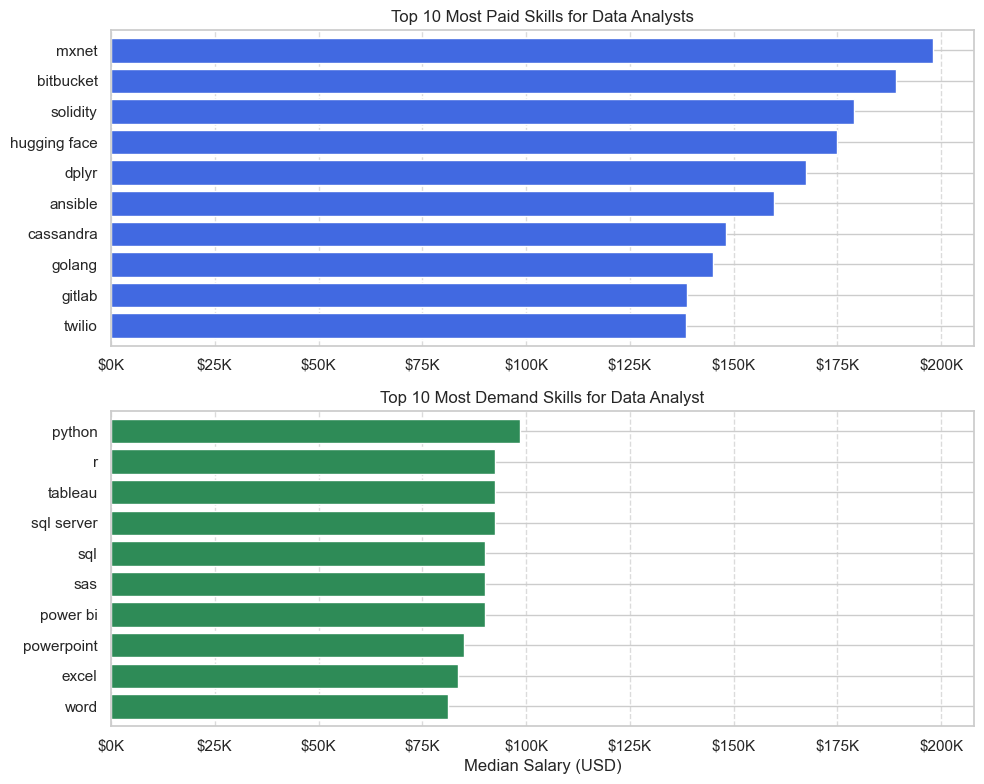

In [15]:

sns.set(style="whitegrid")

# Create the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the top 10 highest-paying skills for Data Analysts
df_DA_top_pay[::-1].plot(
    kind="barh",
    y="median",
    ax=ax[0],
    color="royalblue",
    legend=False,
    title="Top 10 Most Paid Skills for Data Analysts",
    xlabel="",
    ylabel="",
    width=0.8
)

# Format the x-axis for salary
ax[0].xaxis.set_major_formatter(lambda x , _ : f'${int(x/1000)}K')

# Plot the top 10 most common skills for Data Analysts
df_DA_top_skills[::-1].plot(
    kind="barh",
    y="median",
    ax=ax[1],
    color="seagreen",
    legend=False,
    xlabel="Median Salary (USD)",
    ylabel="",
    width=0.8,
    title="Top 10 Most Demand Skills for Data Analyst",
)

# Format the x-axis for salary
ax[1].xaxis.set_major_formatter(lambda x , _ : f'${int(x/1000)}K')

# Set consistent x-limits for both subplots
ax[1].set_xlim(ax[0].get_xlim())

# Add gridlines for better readability
ax[0].grid(True, axis="x", linestyle="--", alpha=0.7)
ax[1].grid(True, axis="x", linestyle="--", alpha=0.7)

# Adjust layout and show the plot
fig.tight_layout()
plt.show()